# Exploratory Data Analysis (EDA)

The data set was downloaded from Hugging Face.
According to the documentation, basic preprocessing was performed already,
and the data was split into a train and test set.

Aim of this notebook is to perform a more detailed EDA to check usability,
and to perform further preprocessing if necessary.

In [1]:
# dependencies
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# paths
PATH_DATA = Path("../data")
PATH_DATA_RAW = PATH_DATA / "raw"
PATH_DATA_PROCESSED = PATH_DATA / "processed"
PATH_TRAIN_RAW = PATH_DATA_RAW / "train"
PATH_TEST_RAW = PATH_DATA_RAW / "test"
PATH_TRAIN_PROCESSED = PATH_DATA_PROCESSED / "train"
PATH_TEST_PROCESSED = PATH_DATA_PROCESSED / "test"


In [2]:
# load the data
X_train = pd.read_csv(PATH_TRAIN_RAW / "X_train.csv")
y_train = pd.read_csv(PATH_TRAIN_RAW / "y_train.csv")

In [3]:
# look at features data frame
X_train

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,...,glyburide-metformin:Steady,glyburide-metformin:Up,A1Cresult:>7,A1Cresult:>8,A1Cresult:None,A1Cresult:Norm,max_glu_serum:>200,max_glu_serum:>300,max_glu_serum:None,max_glu_serum:Norm
0,2.0,38.0,3.0,27.0,0.0,1.0,2.0,7.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,4.0,48.0,0.0,11.0,0.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2.0,28.0,0.0,15.0,0.0,3.0,4.0,9.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4.0,44.0,0.0,10.0,0.0,0.0,0.0,7.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,3.0,54.0,0.0,8.0,0.0,0.0,0.0,8.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81405,2.0,35.0,0.0,12.0,0.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
81406,4.0,42.0,2.0,18.0,0.0,0.0,0.0,9.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
81407,4.0,30.0,1.0,16.0,0.0,0.0,2.0,6.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
81408,12.0,77.0,2.0,21.0,0.0,0.0,0.0,9.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [4]:
# inspect column names
for col in X_train.columns:
    print(col)


time_in_hospital
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
number_diagnoses
change
diabetesMed
race:AfricanAmerican
race:Asian
race:Caucasian
race:Hispanic
race:Other
gender:Female
gender:Male
age:70+
age:[0-10)
age:[10-20)
age:[20-50)
age:[50-70)
admission_type_id:Elective
admission_type_id:Emergency
admission_type_id:New Born
admission_type_id:Trauma Center
discharge_disposition_id:Discharged to Home
discharge_disposition_id:Other
admission_source_id:Emergency
admission_source_id:Other
admission_source_id:Referral
admission_source_id:Transfer
medical_specialty:Cardiology
medical_specialty:Emergency/Trauma
medical_specialty:Family/GeneralPractice
medical_specialty:Gastroenterology
medical_specialty:Hematology/Oncology
medical_specialty:InternalMedicine
medical_specialty:Nephrology
medical_specialty:ObstetricsandGynecology
medical_specialty:Orthopedics
medical_specialty:Other
medical_specialty:Psychiatry
medical_specialty:Pulm

There are no spaces in the column names, but some processing can be done here.
Uppercase letters will be converted to lowercase.
Colons and hyphens will be replaced with underscores.

In [5]:
# replace ":" and "-" with "_" and convert to lowercase
X_train.columns = (
    X_train.columns.str.lower()
    .str.replace(":", "_")
    .str.replace("-", "_")
)
# look at processed column names
for col in X_train.columns:
    print(col)

time_in_hospital
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
number_diagnoses
change
diabetesmed
race_africanamerican
race_asian
race_caucasian
race_hispanic
race_other
gender_female
gender_male
age_70+
age_[0_10)
age_[10_20)
age_[20_50)
age_[50_70)
admission_type_id_elective
admission_type_id_emergency
admission_type_id_new born
admission_type_id_trauma center
discharge_disposition_id_discharged to home
discharge_disposition_id_other
admission_source_id_emergency
admission_source_id_other
admission_source_id_referral
admission_source_id_transfer
medical_specialty_cardiology
medical_specialty_emergency/trauma
medical_specialty_family/generalpractice
medical_specialty_gastroenterology
medical_specialty_hematology/oncology
medical_specialty_internalmedicine
medical_specialty_nephrology
medical_specialty_obstetricsandgynecology
medical_specialty_orthopedics
medical_specialty_other
medical_specialty_psychiatry
medical_specialty_pulm

In [6]:
# look at labels data frame
y_train

,readmitted
0,0
1,0
2,1
3,0
4,0
...,...
81405,1
81406,0
81407,1
81408,1


In [7]:
# check for missing values
X_train.isna().sum().any()

np.False_

There are no missing values in the data set.

In [8]:
# check for duplicates
X_train.duplicated().sum()

np.int64(3)

There are three duplicate rows in the data set.

In [9]:
# remove duplicates

# get index of duplicate rows
duplicated_X_train = X_train[X_train.duplicated()].index

# remove duplicate rows
X_train = X_train.drop(duplicated_X_train)
y_train = y_train.drop(duplicated_X_train)

# check for duplicates again
X_train.duplicated().sum()

np.int64(0)

Now, no duplicates are left in the data set.

In [10]:
# analyze target variable and check for class imbalance
n_not_readmitted, n_readmitted = y_train.value_counts()

print(f"Number of patients not readmitted: {n_not_readmitted}")
print(f"Number of patients readmitted: {n_readmitted}")

print(f"Proportion of patients not readmitted: {n_not_readmitted / (n_not_readmitted + n_readmitted):.2%}")
print(f"Proportion of patients readmitted: {n_readmitted / (n_not_readmitted + n_readmitted):.2%}")


Number of patients not readmitted: 43842
Number of patients readmitted: 37565
Proportion of patients not readmitted: 53.86%
Proportion of patients readmitted: 46.14%


The target variable is binary.
There are only two outcomes: not readmitted (0) and readmitted (1).

There is a slight class imbalance in the data set.
54% of the patients are not readmitted, 46% are readmitted.
However, the class imbalance is not extreme, so no further action is necessary.

In [11]:
# check for range and distribution of values
X_train.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesmed,...,glyburide_metformin_steady,glyburide_metformin_up,a1cresult_>7,a1cresult_>8,a1cresult_none,a1cresult_norm,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_none,max_glu_serum_norm
count,81407.000000,81407.000000,81407.000000,81407.000000,81407.000000,81407.000000,81407.000000,81407.000000,81407.000000,81407.000000,...,81407.000000,81407.000000,81407.000000,81407.000000,81407.000000,81407.000000,81407.000000,81407.000000,81407.000000,81407.000000
mean,4.402447,43.080288,1.340413,16.021055,0.368863,0.198214,0.634945,7.424128,0.462503,0.769811,...,0.006977,0.000061,0.037343,0.080878,0.832447,0.049332,0.014741,0.012456,0.947584,0.025219
std,2.985945,19.688834,1.707769,8.128705,1.264164,0.936854,1.263005,1.931927,0.498595,0.420956,...,0.083239,0.007837,0.189603,0.272649,0.373471,0.216562,0.120514,0.110910,0.222865,0.156791
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,19.000000,16.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Features have different ranges of values.
All will be scaled to the same range of values.
Binary features (those that only have 0s and 1s) will be used as is.
All other features will be scaled to the range of 0 to 1.

In [12]:
# get binary columns by checking if the unique values are only 0 and 1
binary_cols = X_train.columns[
    X_train.apply(lambda x: set(x.unique()) <= {0, 1})
]

# get non-binary columns by excluding binary columns from all columns
non_binary_cols = list(set(X_train.columns) - set(binary_cols))

non_binary_cols

['num_medications',
 'time_in_hospital',
 'number_diagnoses',
 'number_inpatient',
 'num_procedures',
 'num_lab_procedures',
 'number_emergency',
 'number_outpatient']

Non-binary columns will be scaled to the range of 0 to 1.
To check whether normalization or standardization is appropriate,
we can plot the histograms of the features and check the distribution for 
normality.

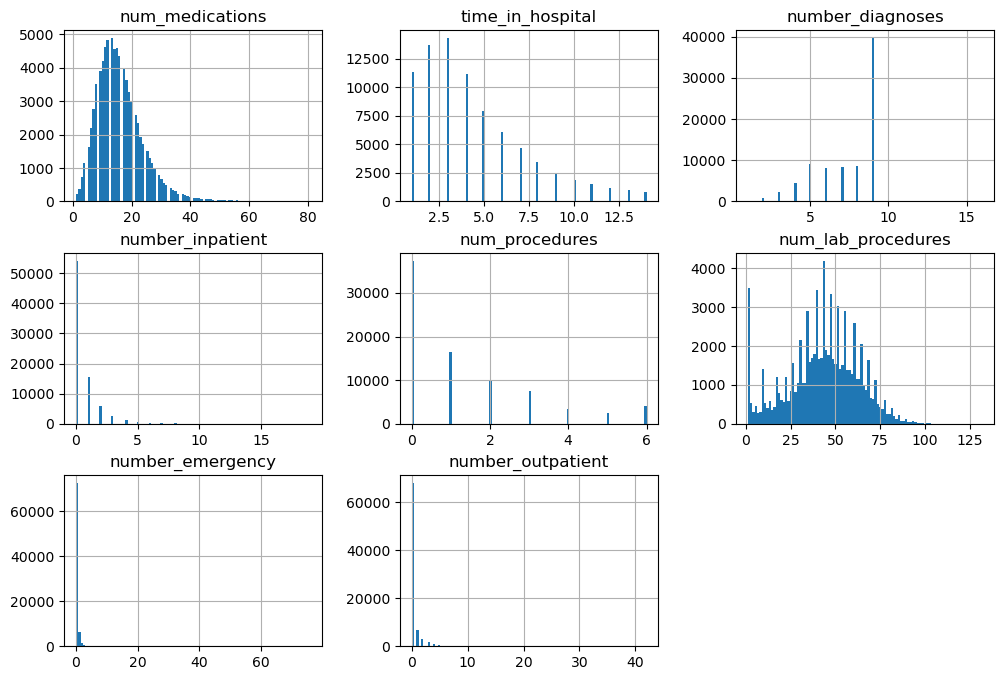

In [13]:
# plot histograms of non-binary features
X_train[non_binary_cols].hist(bins=100, figsize=(12, 8))
plt.show()

Some features have a skewed distribution, which is not good for machine learning.
They will first be log transformed.

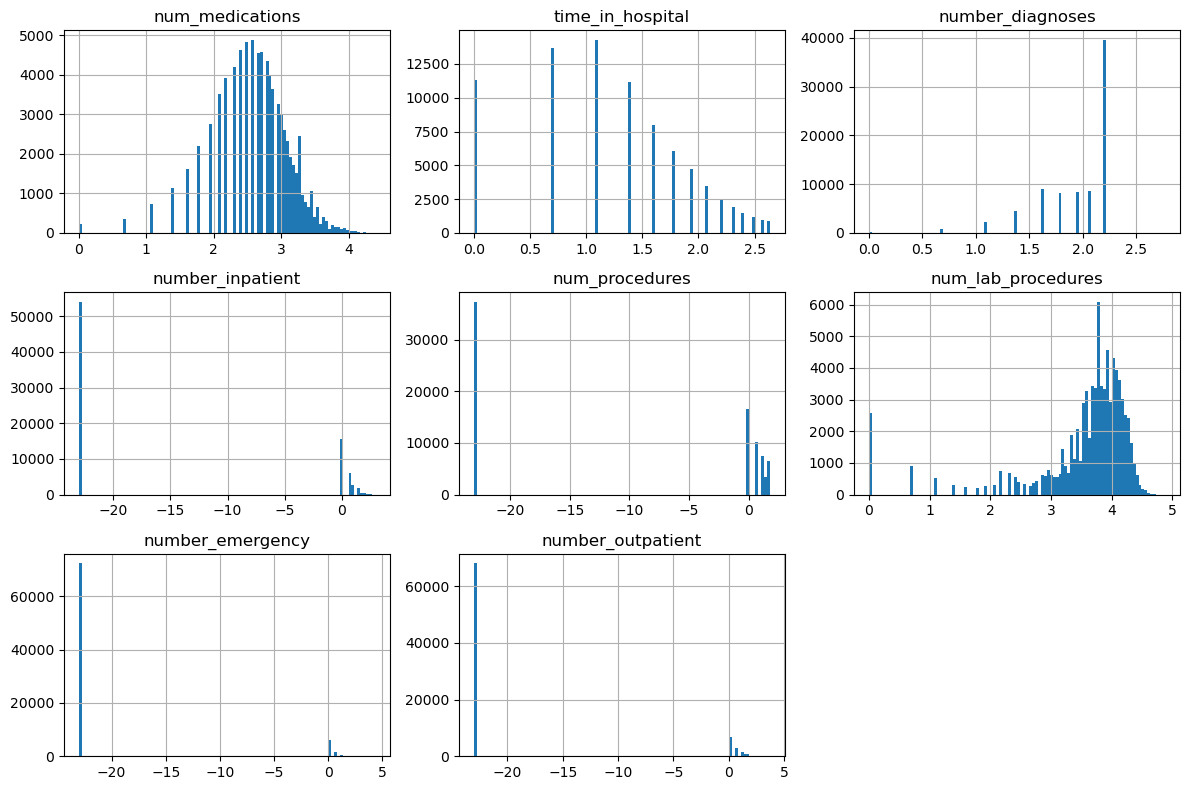

In [14]:
# some values are 0, -> add a small constant before log transformation
epsilon = 1e-10  # small constant to avoid log(0)
X_train[non_binary_cols] = np.log(X_train[non_binary_cols] + epsilon)

# plot histograms of features
X_train[non_binary_cols].hist(bins=100, figsize=(12, 8))
plt.tight_layout()  # adjust subplot spacing
plt.show()

Features like `num_lab_procedures` and `num_medications` are less skewed and
closer to normal-like distributions.

`number_outpatient`, `number_inpatient`, and `number_emergency`,
which were previously dominated by zeros and outliers,
now have a more condensed and interpretable spread.

`number_diagnoses` and `time_in_hospital` are still skewed.
This could pose challenges to certain models, especially linear models.
For tree-based models, this is not a problem, however.

In [15]:
# normalize features
scaler = MinMaxScaler()
X_train[non_binary_cols] = scaler.fit_transform(X_train[non_binary_cols])

# plotting is not necessary, as min max scaling does not change the distribution
# of the features, but only scales them to a range of 0 to 1

Top 10 features most correlated with readmission:
                          feature  correlation
6                number_inpatient     0.215697
5                number_emergency     0.124654
7                number_diagnoses     0.110731
4               number_outpatient     0.108143
31   admission_source_id_transfer    -0.078349
28  admission_source_id_emergency     0.074250
3                 num_medications     0.071306
0                time_in_hospital     0.062580
9                     diabetesmed     0.057545
22     admission_type_id_elective    -0.051925


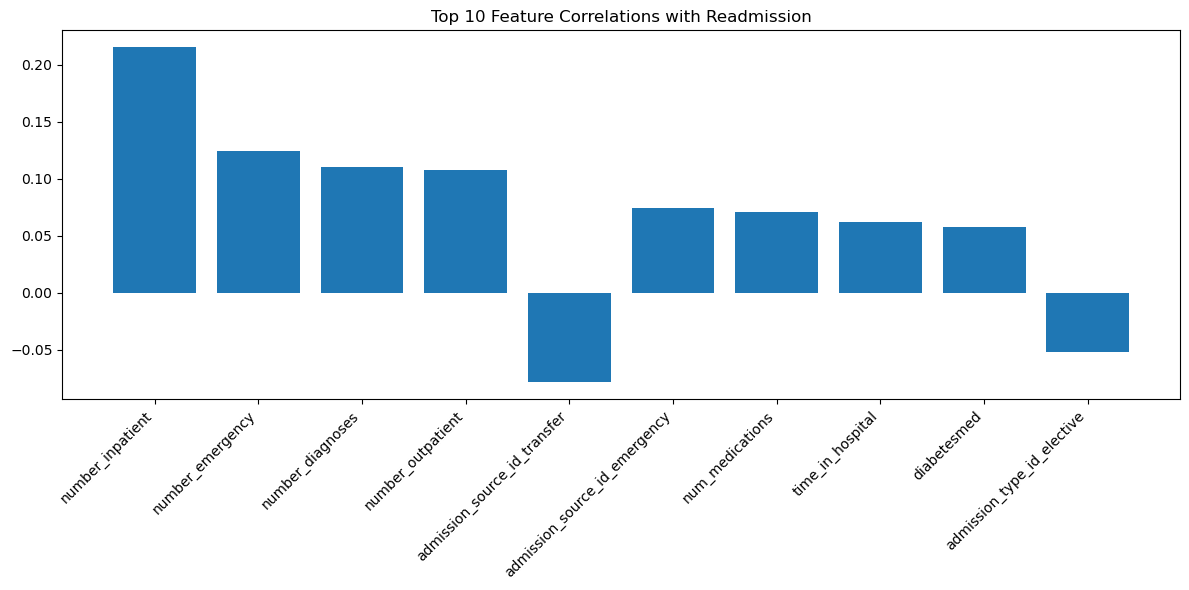

In [16]:
# use correlation to check feature importance

# calculate correlations between features and target
correlations = pd.DataFrame({
    'feature': X_train.columns,
    'correlation': [
        X_train[col].corr(y_train['readmitted']) for col in X_train.columns
    ]
})

# sort by absolute correlation value to get positive and negative correlations
correlations = correlations.reindex(
    correlations['correlation'].abs().sort_values(ascending=False).index
)

# display top 10 most correlated features
print("Top 10 features most correlated with readmission:")
print(correlations.head(10))

# visualize with a bar plot
plt.figure(figsize=(12, 6))
plt.bar(
    correlations['feature'][:10],  # top 10 features
    correlations['correlation'][:10]
)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Feature Correlations with Readmission')
plt.tight_layout()
plt.show()

According to the correlation analysis, the most important feature by a margin is
`number_inpatient`, which is the number of inpatient visits of the patient in
the year preceding the encounter.
An inpatient is a patient who is admitted to a hostitals and stays there for at
least one night.

Also among the top 10 features by correlation are `number_outpatient`, which is
the number of visits without staying overnight, and `number_emergency`, which
is the number of emergency visits.

Ultimately, they are all related to the number of visits of the patient.
It makes sense that the number of visits is correlated with the probability of
readmission.
If a patient visited the hospital frequently before, it is reasonable to assume
that they will visit the hospital again, because it may be a sign of a chronic
condition.

Further features among the top 10 are `diabetesmed` (if any medication was
prescribed) and `num_medications` (the total number of distinct medications
prescribed).
This makes sense, as it may indicate severity of the condition.
The remaining features, `time_in_hospital`, `num_diagnoses` (number of
diagnoses entered to the system) etc. can be interpreted in similar ways.

In [17]:
# apply the same preprocessing to the test set
X_test = pd.read_csv(PATH_TEST_RAW / "X_test.csv")
y_test = pd.read_csv(PATH_TEST_RAW / "y_test.csv")

# replace ":" and "-" with "_" and convert to lowercase
X_test.columns = (
    X_test.columns.str.lower()
    .str.replace(":", "_")
    .str.replace("-", "_")
)

# log transform non-binary features
X_test[non_binary_cols] = np.log(X_test[non_binary_cols] + epsilon)

# normalize features
X_test[non_binary_cols] = scaler.transform(X_test[non_binary_cols])

In [18]:
# make directories for processed data
PATH_TRAIN_PROCESSED.mkdir(parents=True, exist_ok=True)
PATH_TEST_PROCESSED.mkdir(parents=True, exist_ok=True)

# save the processed data
X_train.to_csv(PATH_TRAIN_PROCESSED / "X_train.csv", index=False)
y_train.to_csv(PATH_TRAIN_PROCESSED / "y_train.csv", index=False)
X_test.to_csv(PATH_TEST_PROCESSED / "X_test.csv", index=False)
y_test.to_csv(PATH_TEST_PROCESSED / "y_test.csv", index=False)
